## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from random import sample 

In [2]:
#For the purpose of Analysis we have taken flight for DL carrier in 2019.
df = pd.read_csv('DL flights in 2019.csv', low_memory=False)

In [3]:
df.head()

,fl_date,mkt_carrier,mkt_carrier_fl_num,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,01/01/2019,DL,3500,N702BR,3500,14696,SBN,"South Bend, IN",10397,ATL,...,566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01/01/2019,DL,3522,N768SK,3522,14457,RAP,"Rapid City, SD",14869,SLC,...,508,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01/01/2019,DL,3525,N807SK,3525,13433,MOT,"Minot, ND",13487,MSP,...,449,215.0,0.0,0.0,0.0,0.0,1214.0,6.0,6.0,NaN
3,01/01/2019,DL,3526,N630SK,3526,13342,MKE,"Milwaukee, WI",13487,MSP,...,297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01/01/2019,DL,3528,N823SK,3528,11433,DTW,"Detroit, MI",14100,PHL,...,453,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.dtypes

fl_date                 object
mkt_carrier             object
mkt_carrier_fl_num       int64
tail_num                object
op_carrier_fl_num        int64
origin_airport_id        int64
origin                  object
origin_city_name        object
dest_airport_id          int64
dest                    object
dest_city_name          object
crs_dep_time             int64
dep_time               float64
dep_delay              float64
taxi_out               float64
wheels_off             float64
wheels_on              float64
taxi_in                float64
crs_arr_time             int64
arr_time               float64
arr_delay              float64
cancelled                int64
cancellation_code       object
diverted                 int64
dup                     object
crs_elapsed_time         int64
actual_elapsed_time    float64
air_time               float64
flights                  int64
distance                 int64
carrier_delay          float64
weather_delay          float64
nas_dela

#Delay is the sum of 
- **carrier_delay**: Carrier Delay, in Minutes
- **weather_delay**: Weather Delay, in Minutes
- **nas_delay**: National Air System Delay, in Minutes
- **security_delay**: Security Delay, in Minutes
- **late_aircraft_delay**: Late Aircraft Delay, in Minutes

In [5]:
df[['carrier_delay',
    'weather_delay', 'nas_delay',
    'security_delay', 'late_aircraft_delay' ]]=df[['carrier_delay', 
                                                   'weather_delay', 'nas_delay', 
                                                   'security_delay', 'late_aircraft_delay' ]].fillna(0)

In [6]:
#Let's add additional column called delay as sum of the above mentioned columns.
df['Delay']= df['carrier_delay'] + \
            df['weather_delay'] + \
            df['nas_delay'] + \
            df['security_delay'] + \
            df['late_aircraft_delay']

In [7]:
df['Delay'].fillna(0, inplace=True)


In [11]:
df['Delay'].sort_values(ascending=False)

357619    2923.0
182420    1685.0
649366    1657.0
346597    1572.0
905060    1546.0
           ...  
659096       0.0
659095       0.0
659094       0.0
659093       0.0
0            0.0
Name: Delay, Length: 1048575, dtype: float64

In [14]:
df_hist = df.loc[df['Delay'] < 1000, 'Delay']

#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

In [30]:
print('Statistic:\t\tP-value')
for _ in range(10):
    smp=sample(list(df['Delay']), 1000)
    tpl=shapiro(smp)
    print(tpl[0], '\t', tpl[1])
    

Statistic:		P-value
0.30467140674591064 	 0.0
0.2560873031616211 	 0.0
0.2607974410057068 	 0.0
0.26922160387039185 	 0.0
0.2358207106590271 	 0.0
0.2828512191772461 	 0.0
0.3090495467185974 	 0.0
0.2982289791107178 	 0.0
0.25926774740219116 	 0.0
0.2414240837097168 	 0.0


In [17]:
shapiro(df['Delay'])

C:\Users\Beasty\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.25682348012924194, 0.0)

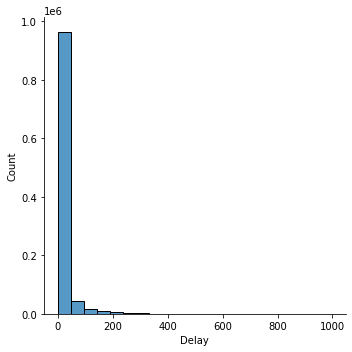

In [15]:
#Now when the total delay time is ready we can plot our histogram.
sns.displot(df_hist)

#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

#### **Task 6**: How many states cover 50% of US air traffic? 

#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?